In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
import sys
import os
PATH = os.getcwd()
sys.path.append(PATH)

In [3]:
import pandas as pd
import numpy as np

import os
import pickle
import random
import joblib

import EncoderFactory
#from DatasetManager_for_colab import DatasetManager
from DatasetManager import DatasetManager
import BucketFactory

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
#import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statistics
import math

import warnings
warnings.filterwarnings('ignore')

sns.set_theme('paper', 'whitegrid')
sns.set_palette("hls")
cmap = sns.color_palette("copper", as_cmap=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
from scipy.stats import tmean, scoreatpercentile
def trimmean(arr, percent = 0.5):
    lower_limit = scoreatpercentile(arr, percent/2)
    upper_limit = scoreatpercentile(arr, 100-percent/2)
    #print(lower_limit, upper_limit)
    return tmean(arr, limits=(lower_limit, upper_limit), inclusive=(True, True))

<AxesSubplot:>

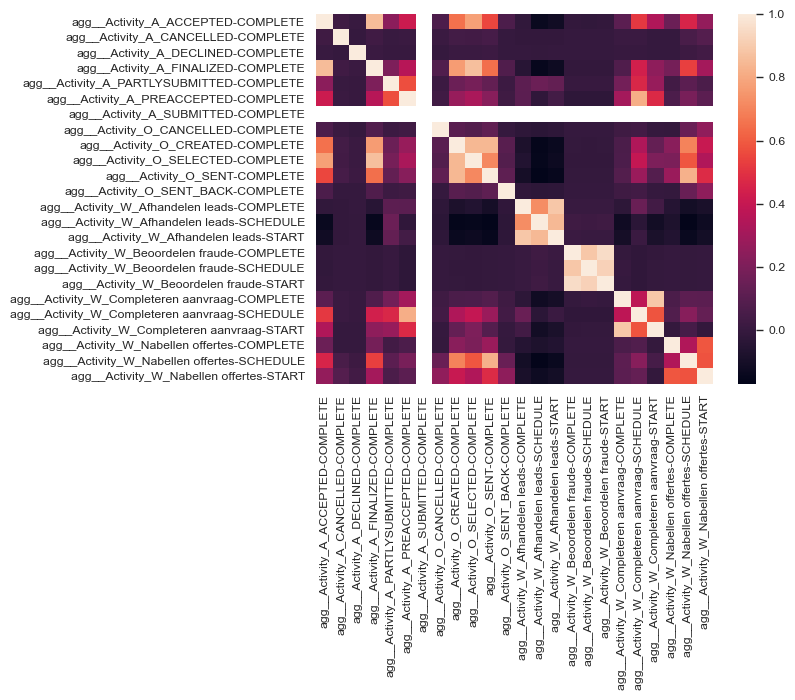

In [5]:
dataset_name = "bpic2012"
bucket = "single"
encoding="agg"
model="xgboost"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucket, encoding))

#for bucket in range(1, num_buckets+1):
sample = pd.read_csv(os.path.join(folder_loc, "train_data/train_data_bucket_1.csv"))
#    vec_lens.append(sample.shape[1])
activity_cols = [col for col in sample.columns if "Activity" in col]
sns.heatmap(sample[activity_cols].corr())

In [6]:
[str(col) for col in sample.columns]

['static__AMOUNT_REQ',
 'agg__Activity_A_ACCEPTED-COMPLETE',
 'agg__Activity_A_CANCELLED-COMPLETE',
 'agg__Activity_A_DECLINED-COMPLETE',
 'agg__Activity_A_FINALIZED-COMPLETE',
 'agg__Activity_A_PARTLYSUBMITTED-COMPLETE',
 'agg__Activity_A_PREACCEPTED-COMPLETE',
 'agg__Activity_A_SUBMITTED-COMPLETE',
 'agg__Activity_O_CANCELLED-COMPLETE',
 'agg__Activity_O_CREATED-COMPLETE',
 'agg__Activity_O_SELECTED-COMPLETE',
 'agg__Activity_O_SENT-COMPLETE',
 'agg__Activity_O_SENT_BACK-COMPLETE',
 'agg__Activity_W_Afhandelen leads-COMPLETE',
 'agg__Activity_W_Afhandelen leads-SCHEDULE',
 'agg__Activity_W_Afhandelen leads-START',
 'agg__Activity_W_Beoordelen fraude-COMPLETE',
 'agg__Activity_W_Beoordelen fraude-SCHEDULE',
 'agg__Activity_W_Beoordelen fraude-START',
 'agg__Activity_W_Completeren aanvraag-COMPLETE',
 'agg__Activity_W_Completeren aanvraag-SCHEDULE',
 'agg__Activity_W_Completeren aanvraag-START',
 'agg__Activity_W_Nabellen offertes-COMPLETE',
 'agg__Activity_W_Nabellen offertes-SCHEDULE

# Model Accuracy

In [7]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["decision_tree", "logit", "nb"]

for dataset_name in dataset_names:
    print("________________________________________________________")
    for model in models:
        print(dataset_name, model)
        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))
        cls = joblib.load(os.path.join(folder_loc, "cls.joblib"))
        X_test = pd.read_csv(os.path.join(PATH, dataset_name, "datasets", dataset_name+"_Xtest.csv"), index_col=False, sep=";")
        y_test = pd.read_csv(os.path.join(PATH, dataset_name, "datasets", dataset_name+"_Ytest.csv"), index_col=False).values
        
        preds = cls.predict(X_test.values)
        print("F1 Score:", f1_score(y_test, preds))

________________________________________________________
breast_cancer decision_tree
F1 Score: 0.8846153846153847
breast_cancer logit
F1 Score: 0.9818181818181818
breast_cancer nb
F1 Score: 0.923076923076923
________________________________________________________
compas decision_tree
F1 Score: 0.6891651865008881
compas logit
F1 Score: 0.7172413793103448
compas nb
F1 Score: 0.7191780821917808
________________________________________________________
diabetes decision_tree
F1 Score: 0.7415730337078651
diabetes logit
F1 Score: 0.6933333333333332
diabetes nb
F1 Score: 0.6575342465753423
________________________________________________________
income decision_tree
F1 Score: 0.8106365834004835
income logit
F1 Score: 0.8128078817733991
income nb
F1 Score: 0.7998439328911432
________________________________________________________
iris decision_tree
F1 Score: 1.0
iris logit
F1 Score: 1.0
iris nb
F1 Score: 1.0
________________________________________________________
mushroom decision_tree
F1 Sc

________________________________________________________
bpic2012 decision_tree single_agg
single
F1 Score: 0.4531779491376789


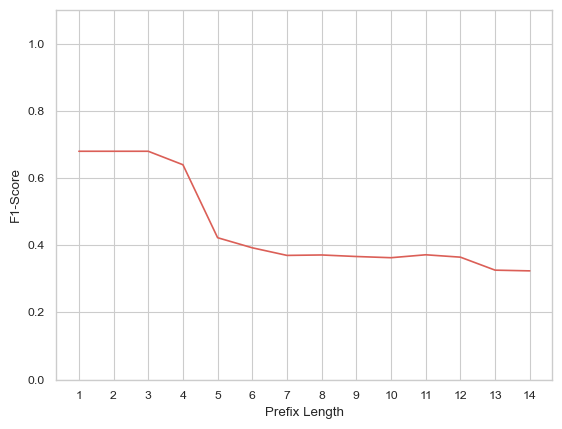

bpic2012 decision_tree prefix_agg
prefix
F1 Score: 0.5744199324846875


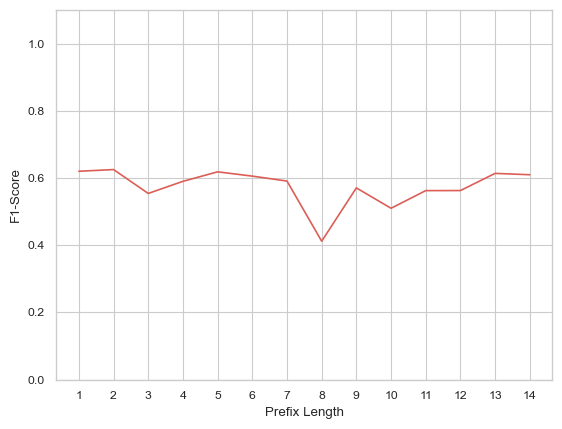

bpic2012 decision_tree prefix_index
prefix
F1 Score: 0.5557332055585257


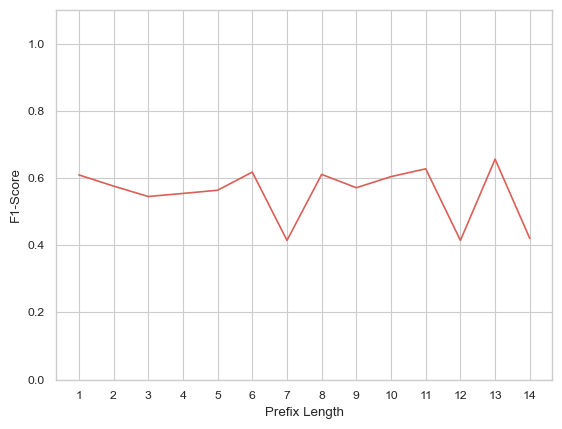

bpic2012 logit single_agg
single
F1 Score: 0.38189855206176543


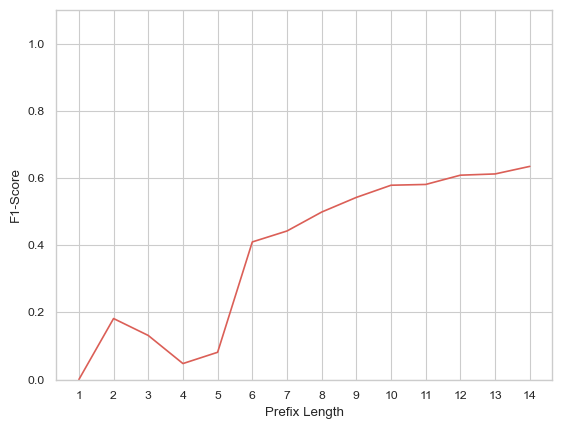

bpic2012 logit prefix_agg
prefix
F1 Score: 0.4842990400438583


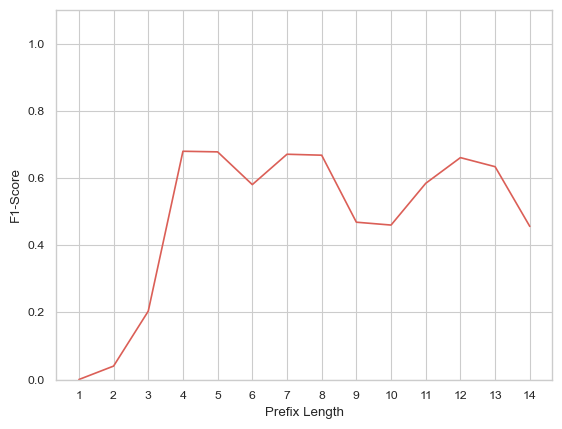

bpic2012 logit prefix_index
prefix
F1 Score: 0.2844119408820578


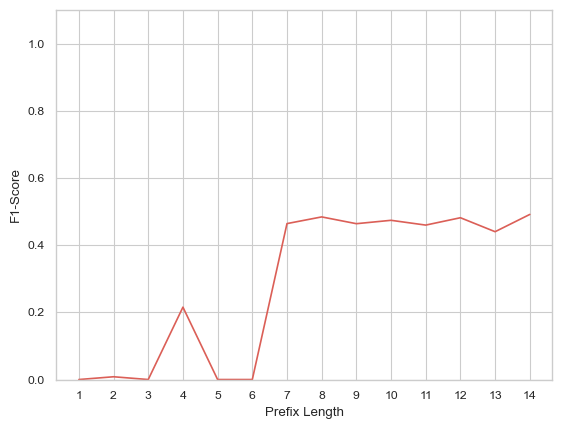

bpic2012 nb single_agg
single
F1 Score: 0.21283027989679873


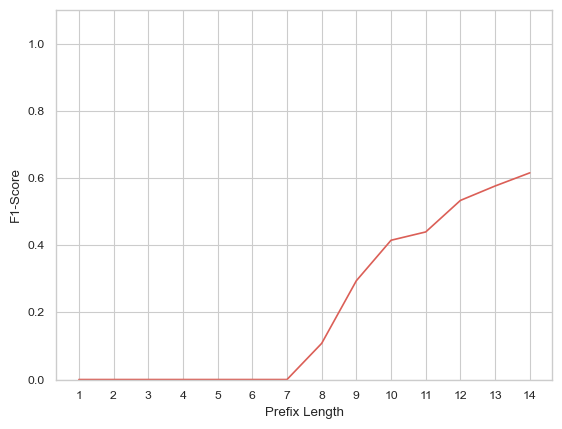

bpic2012 nb prefix_agg
prefix
F1 Score: 0.29133917153796685


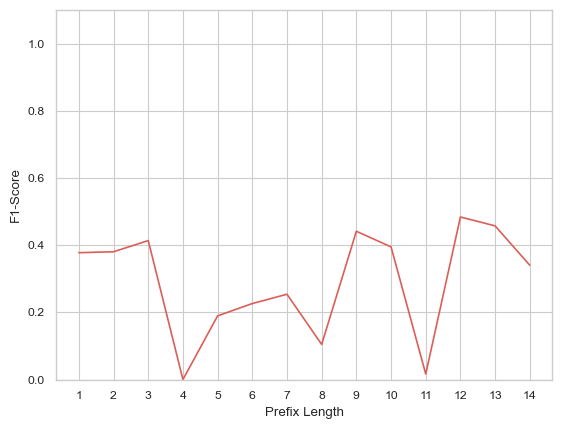

bpic2012 nb prefix_index
prefix
F1 Score: 0.4228874329456604


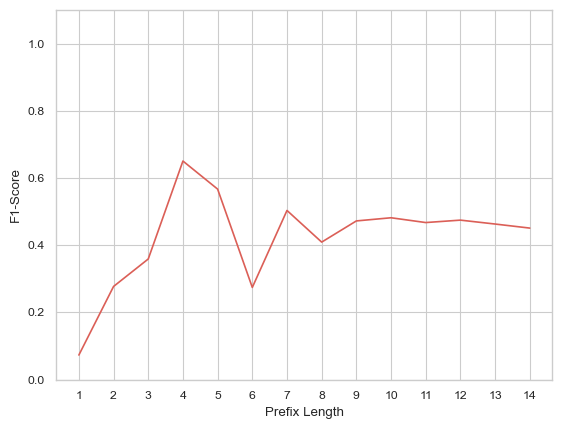

________________________________________________________
sepsis_cases decision_tree single_agg
single
F1 Score: 0.0


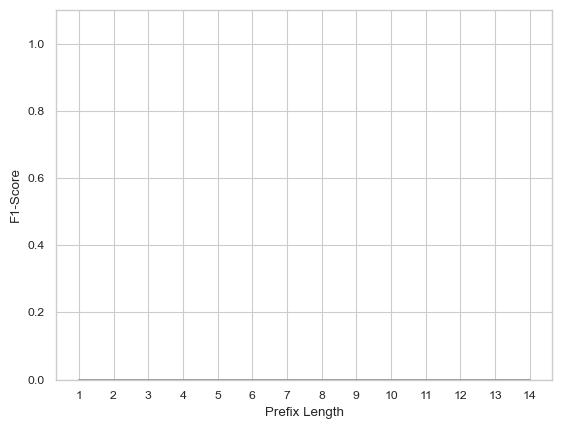

sepsis_cases decision_tree prefix_agg
prefix
F1 Score: 0.21313729253161692


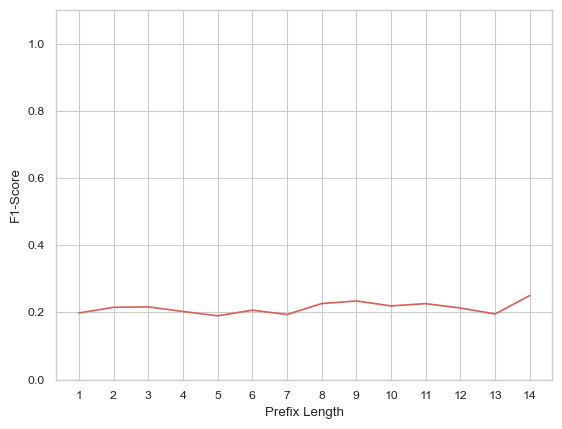

sepsis_cases decision_tree prefix_index
prefix
F1 Score: 0.23497201318567043


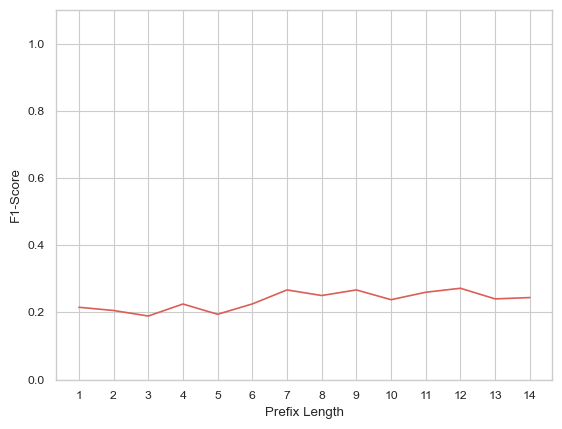

sepsis_cases logit single_agg
single
F1 Score: 0.21954231228739976


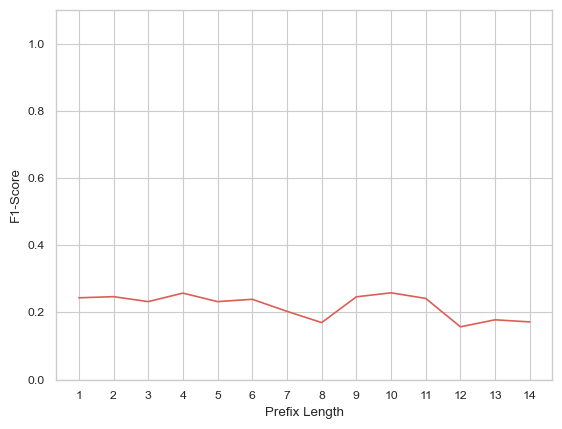

sepsis_cases logit prefix_agg
prefix
F1 Score: 0.2594798252894316


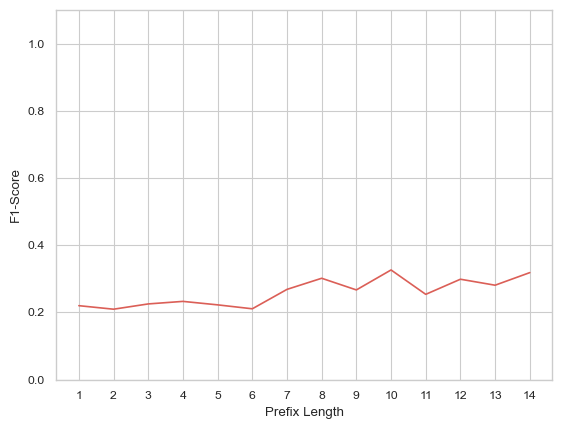

sepsis_cases logit prefix_index
prefix
F1 Score: 0.2361758819986548


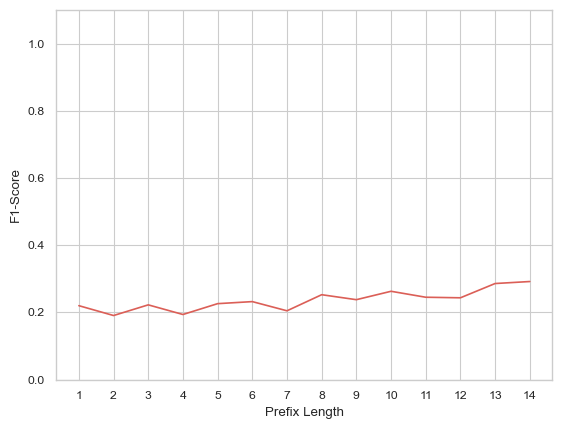

sepsis_cases nb single_agg
single
F1 Score: 0.19666799898973064


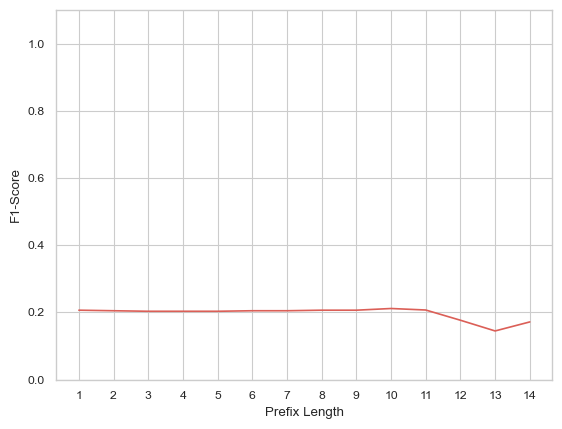

sepsis_cases nb prefix_agg
prefix
F1 Score: 0.19958386595801078


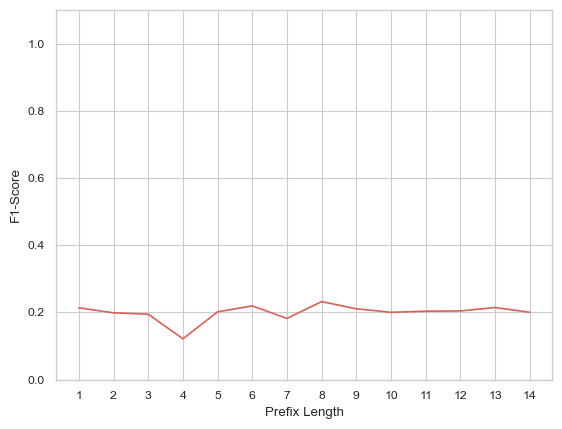

sepsis_cases nb prefix_index
prefix
F1 Score: 0.22128426756775418


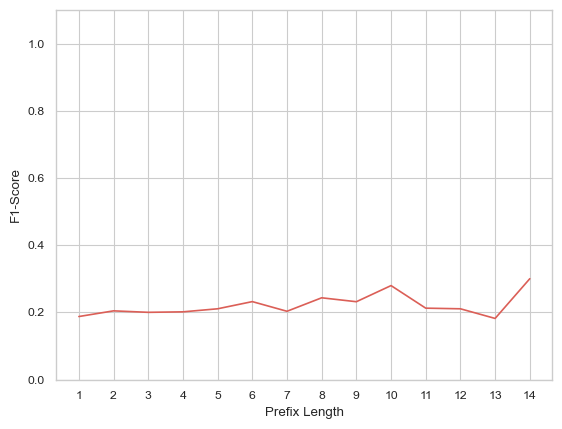

________________________________________________________
production decision_tree single_agg
single
F1 Score: 0.5568640068640069


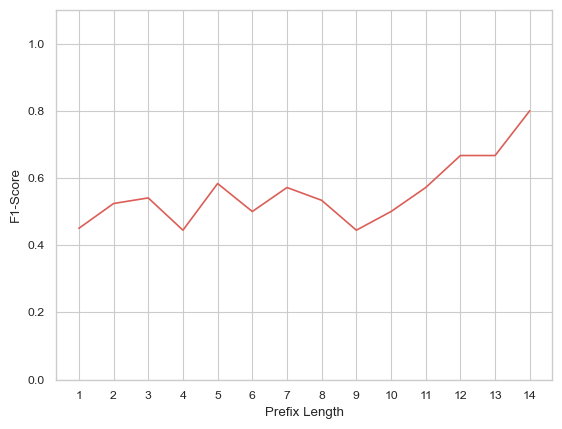

production decision_tree prefix_agg
prefix
F1 Score: 0.7086140983199807


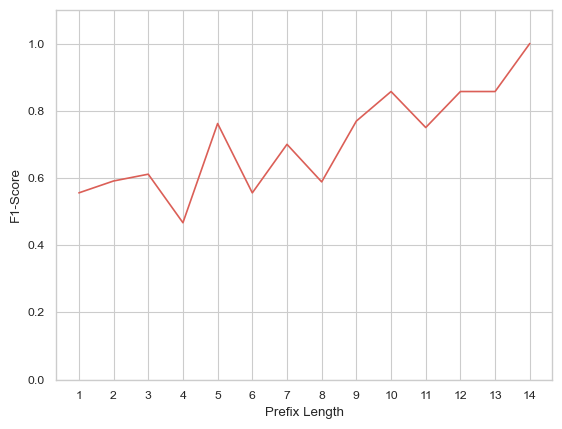

production decision_tree prefix_index
prefix
F1 Score: 0.6785869699779475


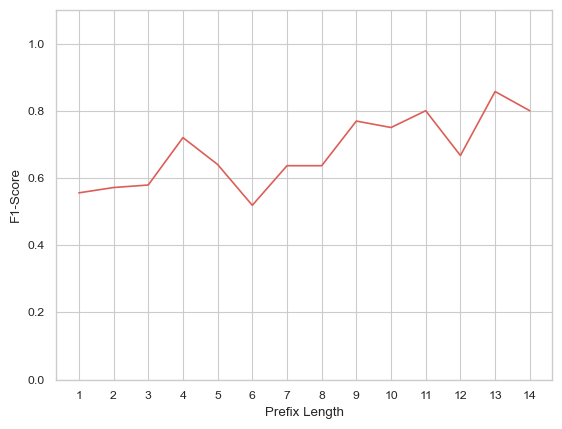

production logit single_agg
single
F1 Score: 0.5810076785411329


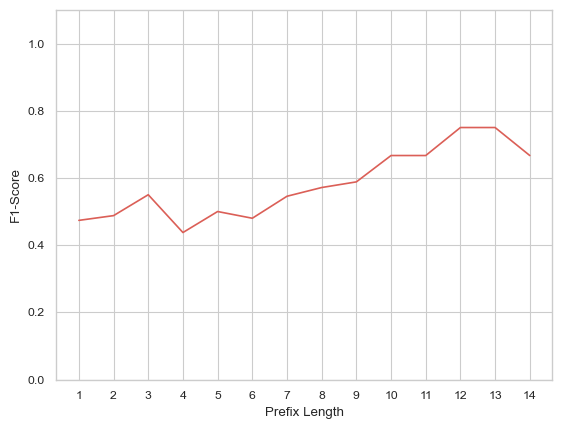

production logit prefix_agg
prefix
F1 Score: 0.5404892100380821


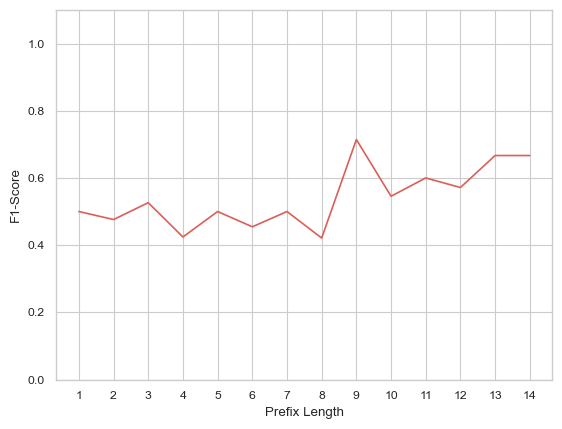

production logit prefix_index
prefix
F1 Score: 0.6266870759902119


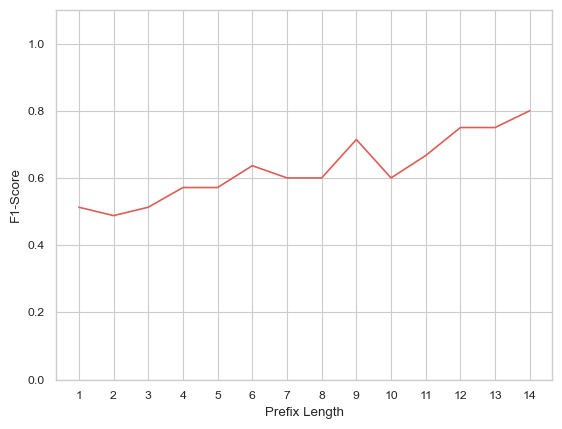

production nb single_agg
single
F1 Score: 0.33600863422292


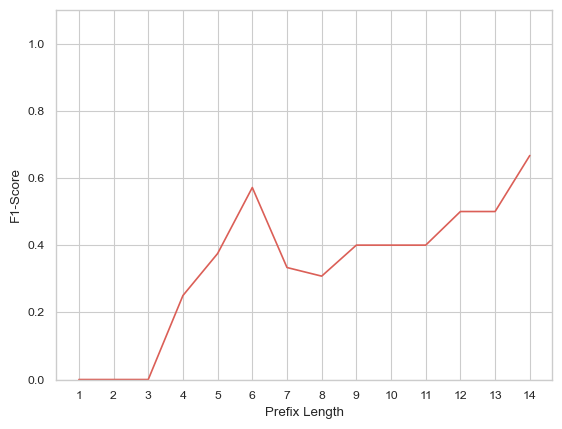

production nb prefix_agg
prefix
F1 Score: 0.5320307069165308


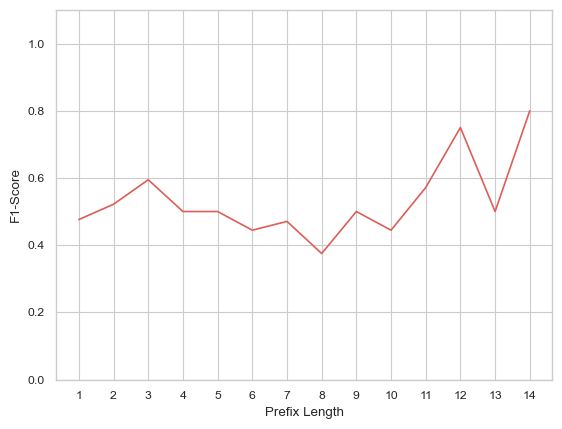

production nb prefix_index
prefix
F1 Score: 0.6203841434213999


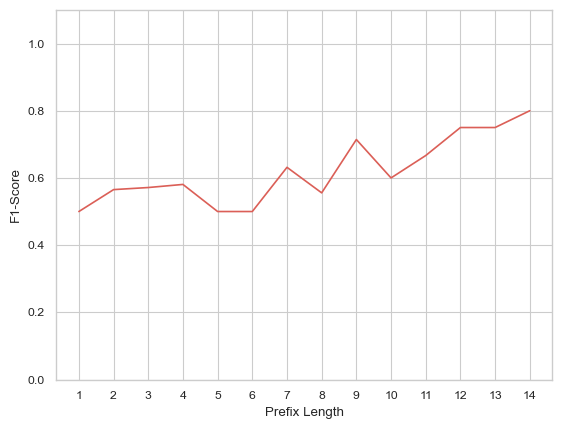

In [8]:
dataset_names = ["bpic2012", "sepsis_cases", "production"]
models= ["decision_tree", "logit", "nb"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]

dataset_ref = {
    "bpic2012" : "bpic2012_accepted",
    "sepsis_cases": "sepsis_cases_1",
    "production" : "production"
}

for dataset_name in dataset_names:
    print("________________________________________________________")
    
    dataset = dataset_ref[dataset_name]
    dataset_manager = DatasetManager(dataset)
    data = dataset_manager.read_dataset()

    min_prefix_length = 1
    max_prefix_length = 14

    dt_train_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/train_prefixes.csv" % (dataset_name)))
    dt_test_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/test_prefixes.csv" % (dataset_name)))
    dt_val_prefixes = pd.read_csv(os.path.join(PATH, "%s/datasets/val_prefixes.csv" % (dataset_name)))
        
    dt_train_prefixes = pd.concat([dt_train_prefixes, dt_val_prefixes])

    dt_train_prefixes = dataset_manager.generate_prefix_data(dt_train_prefixes, min_prefix_length, max_prefix_length)
    dt_test_prefixes = dataset_manager.generate_prefix_data(dt_test_prefixes, min_prefix_length, max_prefix_length)
    
    for model in models:
        for preproc in preprocs:
            print(dataset_name, model, preproc)
            
            if "single" in preproc:
                bucket_method = "single"
            else:
                bucket_method = "prefix"
            
            folder_loc = os.path.join(PATH, "%s/%s/%s" %(dataset_name,model,preproc))
            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])
            
            bucketer_args = {'encoding_method':"agg",
                         'case_id_col':dataset_manager.case_id_col, 
                         'cat_cols':[dataset_manager.activity_col], 
                         'num_cols':[], 
                         'random_state':22}                
            bucketer = BucketFactory.get_bucketer(bucket_method, **bucketer_args)

            bucket_assignments_train = bucketer.fit_predict(dt_train_prefixes)
            bucket_assignments_test = bucketer.predict(dt_test_prefixes)
            
            f1 = []

            if bucket_method=="single":
                relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == 1]
                X_test = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
                y_test = dataset_manager.get_label_numeric(X_test)

                pipeline = joblib.load(os.path.join(folder_loc,'pipelines/pipeline_bucket_1.joblib'))
                
                for bucket in range(1, max_prefix_length+1):
                    bucket_test = X_test[X_test["prefix_nr"]==bucket]
                    bucket_y = dataset_manager.get_label_numeric(bucket_test)
                    preds = pipeline.predict(bucket_test)
                    f1.append(f1_score(bucket_y, preds))

            else:
                for bucket in range(1, num_buckets+1):
                    relevant_test_cases_bucket = dataset_manager.get_indexes(dt_test_prefixes)[bucket_assignments_test == bucket]
                    X_test = dataset_manager.get_relevant_data_by_indexes(dt_test_prefixes, relevant_test_cases_bucket)
                    y_test = dataset_manager.get_label_numeric(X_test)
                    
                    pipeline = joblib.load(os.path.join(folder_loc,'pipelines/pipeline_bucket_%s.joblib' %(bucket)))
                    
                    preds = pipeline.predict(X_test)
                    
#                     sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
#                     results = pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)), sep = ";", index_col=False)

#                     y_test = results["Actual"].values
#                     preds = results["Prediction"].values

                    f1.append(f1_score(y_test, preds))

    #                 cls = joblib.load(os.path.join(folder_loc, "pipelines/pipeline_bucket_%s.joblib" % (bucket)))
    #                 X_test = pd.read_csv(os.path.join(PATH, dataset_name, "datasets", test_prefixes.csv), index_col=False, sep=";")
    #                 y_test = pd.read_csv(os.path.join(PATH, dataset_name, "datasets", dataset_name+"_Ytest.csv"), index_col=False).values

    #                preds = cls.predict(X_test.values)

            print("F1 Score:", np.mean(f1))
            #print(f1)
            plt.plot(np.arange(1, max_prefix_length+1, 1), f1)
            plt.xticks(np.arange(1, max_prefix_length+1, 1))
            plt.ylim(0, 1.1)
            plt.xlabel("Prefix Length")
            plt.ylabel("F1-Score")
            plt.show()

In [9]:
# relevant_test_cases_bucket

# Pick and Choose

In [10]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["xgboost", "logit", "nb"]

dataset = []
cls = []
sub_stab_mean = []
sub_stab_sd = []
weight_stab_mean = []
weight_stab_sd = []
xai = []
vec_lens = []

for model in models:
    for dataset_name in dataset_names:
        print("________________________________________________________")
        print(dataset_name)
        print(model)
        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))

        #num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

#        vec_lens = []

        sample = pd.read_csv(os.path.join(folder_loc, "test_sample.csv"), sep=";")
#         vec_lens.append(sample.shape[1])

        #print("Input length:", vec_lens)

#         #if len(vec_lens) == 1:
#         #    vec_lens = vec_lens * 14

#         # pref_lens = np.arange(1,15,1)
#         # x_ticks = np.arange(1,15,1)

        results = pd.read_csv(os.path.join(folder_loc, "results.csv"), sep=";")#.fillna(1)
#         #grouped = results.groupby("Prefix Length")
        
#         dataset.append(dataset_name)
#         cls.append(model)
#         xai.append("SHAP")
#         vec_lens.append(sample.shape[1])
#         sub_stab_mean.append(np.mean(results["SHAP Subset Stability"]))
#         sub_stab_sd.append(np.std(results["SHAP Subset Stability"]))
#         weight_stab_mean.append(np.mean(results["SHAP Weight Stability"]))
#         weight_stab_sd.append(np.std(results["SHAP Weight Stability"]))
        
#         dataset.append(dataset_name)
#         cls.append(model)
#         xai.append("LIME")
#         sub_stab_mean.append(np.mean(results["LIME Subset Stability"]))
#         sub_stab_sd.append(np.std(results["LIME Subset Stability"]))
#         weight_stab_mean.append(np.mean(results["LIME Weight Stability"]))
#         weight_stab_sd.append(np.std(results["LIME Weight Stability"]))
#         vec_lens.append(sample.shape[1])

        
#         vec_lens.append(sample.shape[1])
#         dataset.append(dataset_name)
#         cls.append(model)
#         xai.append("ACV")
#         sub_stab_mean.append(np.mean(results["ACV Subset Stability"]))
#         sub_stab_sd.append(np.std(results["ACV Subset Stability"]))
#         weight_stab_mean.append(np.mean(results["ACV Weight Stability"]))
#         weight_stab_sd.append(np.std(results["ACV Weight Stability"]))
        
#         dataset.append(dataset_name)
#         vec_lens.append(sample.shape[1])
#         cls.append(model)
#         xai.append("LINDA")
#         sub_stab_mean.append(np.mean(results["LINDA Subset Stability"]))
#         sub_stab_sd.append(np.std(results["LINDA Subset Stability"]))
#         weight_stab_mean.append(np.mean(results["LINDA Weight Stability"]))
#         weight_stab_sd.append(np.std(results["LINDA Weight Stability"]))

        print ("SHAP Subset Stability")
        print("Overall", np.mean(results["SHAP Subset Stability"]))

        print ("SHAP Weight Stability")
        print("Overall", np.mean(results["SHAP Adjusted Weight Stability"]))

        print ("LIME Subset Stability")
        print("Overall", np.mean(results["LIME Subset Stability"]))

        print ("LIME Weight Stability")
        print("Overall", np.mean(results["LIME Adjusted Weight Stability"]))

        print ("ACV Subset Stability")
        print("Overall", np.mean(results["ACV Subset Stability"]))

        print ("ACV Weight Stability")
        print("Overall", np.mean(results["ACV Adjusted Weight Stability"]))

        print ("LINDA-BN Subset Stability")
        print("Overall", np.mean(results["LINDA Subset Stability"]))

        print ("LINDA-BN Weight Stability")
        print("Overall", np.mean(results["LINDA Adjusted Weight Stability"]))

# #np.mean(results[results.columns[3:]])

# df = pd.DataFrame(np.array([dataset, cls, sub_stab_mean, sub_stab_sd, weight_stab_mean, weight_stab_sd, xai, vec_lens]).transpose(), 
#                   columns = ["Dataset", "Model", "Avg Subset Stability", "SD Subset Stability", "Avg Weight Stability", "SD Weight Stability", "XAI Method", "Vector Length"])
# df = df.astype({"Dataset": "category", "Model": "category", "Avg Subset Stability": "float32", "SD Subset Stability": "float32",
#           "Avg Weight Stability": "float32", "SD Weight Stability": "float32", "XAI Method": "category", "Vector Length": "int32"})
# df

________________________________________________________
breast_cancer
xgboost
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.9434366104400003
LIME Weight Stability
Overall 0.9919727953699998
ACV Subset Stability
Overall 1.0
ACV Weight Stability
Overall 1.0
LINDA-BN Subset Stability
Overall 0.9989237024635255
LINDA-BN Weight Stability
Overall 1.0
________________________________________________________
compas
xgboost
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.9922756051699999
LIME Weight Stability
Overall 0.9768832253600003
ACV Subset Stability
Overall 1.0
ACV Weight Stability
Overall 1.0
LINDA-BN Subset Stability
Overall 1.0
LINDA-BN Weight Stability
Overall 1.0
________________________________________________________
diabetes
xgboost
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 1.0
LIME Subset Stability
Overall 0.96606685291
LIME Weight Stability
Overall 0.

In [11]:
dataset_names = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
models= ["xgboost", "logit", "nb"]

dataset = []
cls = []
sub = []
weight = []
xai = []
vec_lens = []
probs = []

for model in models:
    for dataset_name in dataset_names:

        folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))

        #num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

#        vec_lens = []

        sample = pd.read_csv(os.path.join(folder_loc, "test_sample.csv"), sep=";")
#         vec_lens.append(sample.shape[1])

        #print("Input length:", vec_lens)

        #if len(vec_lens) == 1:
        #    vec_lens = vec_lens * 14

        # pref_lens = np.arange(1,15,1)
        # x_ticks = np.arange(1,15,1)

        results = pd.read_csv(os.path.join(folder_loc, "results.csv"), sep=";")#.fillna(1)
        #grouped = results.groupby("Prefix Length")
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        xai.extend(["SHAP"]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["SHAP Subset Stability"].values)
        weight.extend(results["SHAP Adjusted Weight Stability"].values)
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["LIME"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["LIME Subset Stability"].values)
        weight.extend(results["LIME Adjusted Weight Stability"].values)

        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["ACV"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["ACV Subset Stability"].values)
        weight.extend(results["ACV Adjusted Weight Stability"].values)
        
        dataset.extend([dataset_name]*sample.shape[0])
        cls.extend([model]*sample.shape[0])
        probs.extend(results["Prediction Probability"].values)
        xai.extend(["LINDA"]*sample.shape[0])
        vec_lens.extend([sample.shape[1]]*sample.shape[0])
        sub.extend(results["LINDA Subset Stability"].values)
        weight.extend(results["LINDA Adjusted Weight Stability"].values)

#         print ("SHAP Subset Stability")
#         print("Overall", np.mean(results["SHAP Subset Stability"]))

#         print ("SHAP Weight Stability")
#         print("Overall", np.mean(results["SHAP Adjusted Weight Stability"]))

#         print ("LIME Subset Stability")
#         print("Overall", np.mean(results["LIME Subset Stability"]))

#         print ("LIME Weight Stability")
#         print("Overall", np.mean(results["LIME Adjusted Weight Stability"]))

#         print ("ACV Subset Stability")
#         print("Overall", np.mean(results["ACV Subset Stability"]))

#         print ("ACV Weight Stability")
#         print("Overall", np.mean(results["ACV Adjusted Weight Stability"]))

#         print ("LINDA-BN Subset Stability")
#         print("Overall", np.mean(results["LINDA Subset Stability"]))

#         print ("LINDA-BN Weight Stability")
#         print("Overall", np.mean(results["LINDA Adjusted Weight Stability"]))

#np.mean(results[results.columns[3:]])

df = pd.DataFrame(np.array([dataset, cls, sub, weight, xai, vec_lens, probs]).transpose(), 
                  columns = ["Dataset", "Model", "Subset Stability", "Weight Stability", "XAI Method", "Vector Length", "Prediction Probability"])
df = df.astype({"Dataset": "category", "Model": "category", "Subset Stability": "float32", "Weight Stability": "float32", 
                "XAI Method": "category", "Vector Length": "int32", "Prediction Probability": "float32"})
df.isna().sum()

Dataset                      0
Model                        0
Subset Stability          1582
Weight Stability             0
XAI Method                   0
Vector Length                0
Prediction Probability       0
dtype: int64

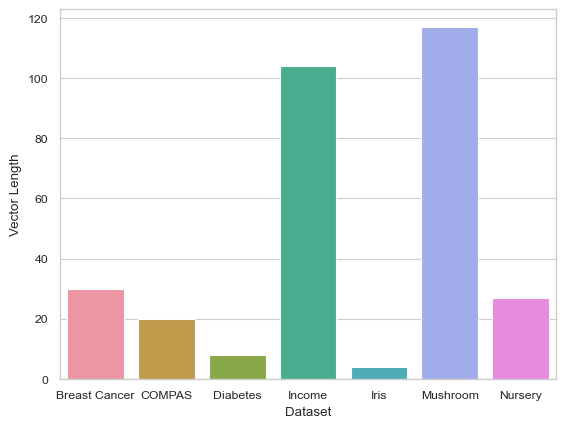

xgboost


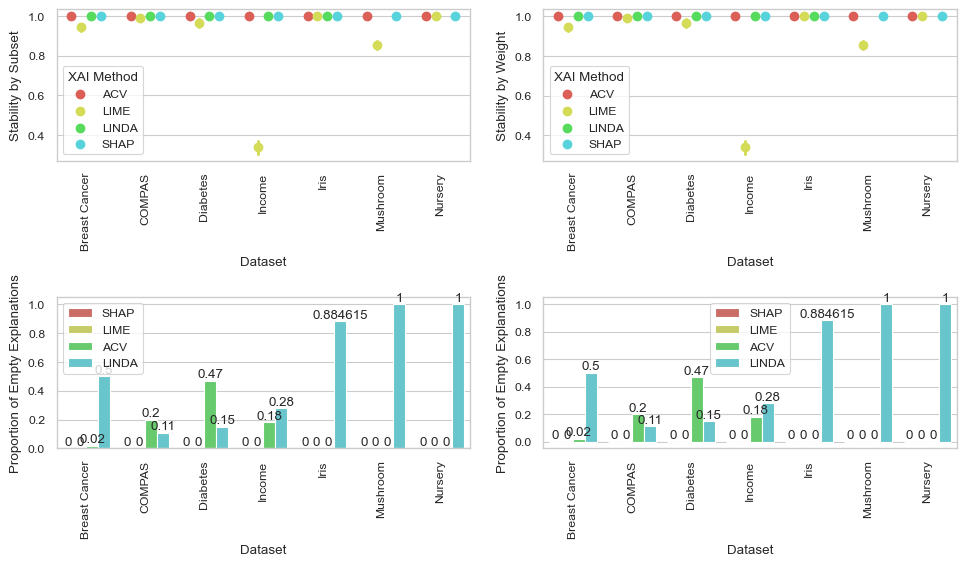

logit


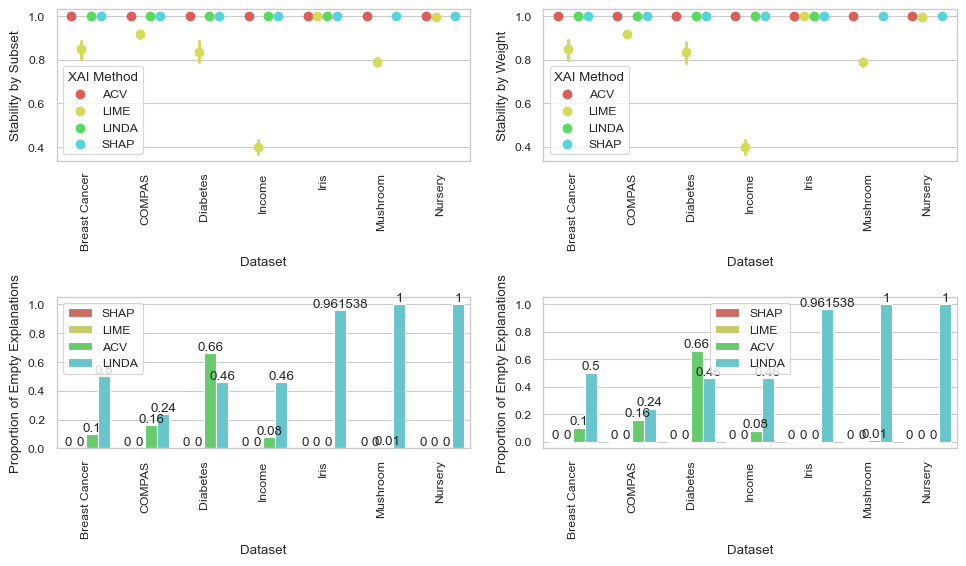

nb


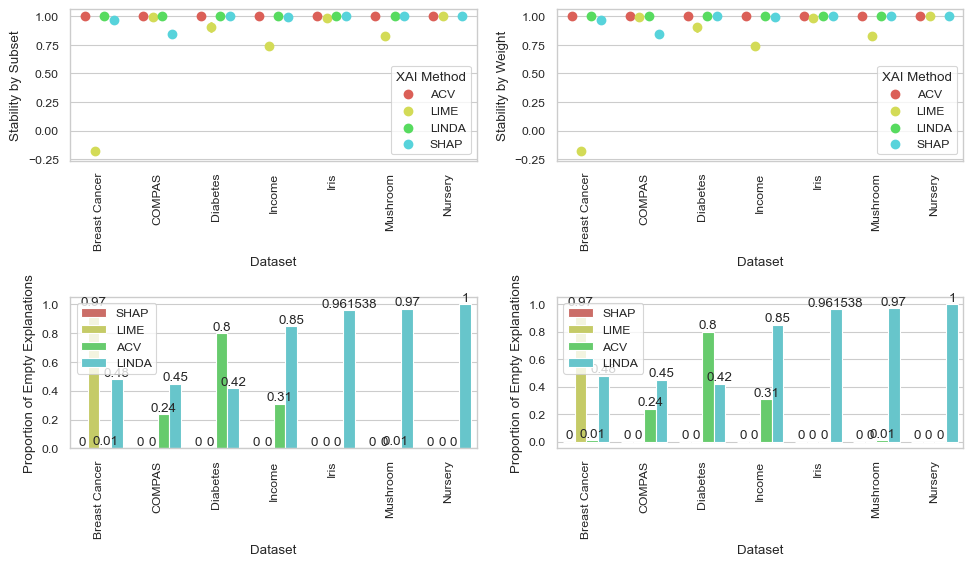

In [12]:
datasets = ["Breast Cancer", "COMPAS", "Diabetes", "Income", "Iris", "Mushroom", "Nursery"]

sns.barplot(data = df, x = "Dataset", y = "Vector Length")
plt.xticks(plt.xticks()[0], labels=datasets)
plt.show()

for model in models:
    print(model)
    mod_df = df[df["Model"]==model]
        
    fig, ax = plt.subplots(2, 2, figsize=(10, 6))

    sns.pointplot(data = mod_df, x = "Dataset", y = "Subset Stability", errorbar="sd", ax=ax[0][0], hue="XAI Method", dodge=0.5, join=False )

    ax[0][0].set_xlabel("Dataset")
    ax[0][0].set_ylabel("Stability by Subset")
    ax[0][0].set_xticklabels(datasets, rotation=90)
        
    sns.pointplot(data = mod_df, x = "Dataset", y = "Subset Stability", errorbar="sd", ax=ax[0][1], hue="XAI Method", dodge=0.5, join=False )
    
    ax[0][1].set_xlabel("Dataset")
    ax[0][1].set_ylabel("Stability by Weight")
    ax[0][1].set_xticklabels(datasets, rotation=90)
    
    data_labels = []
    empty_prop = []
    xai = []
    #grouped = mod_df.groupby("Dataset")
    
    for i in range(len(dataset_names)):
        data = dataset_names[i]
        data_df = mod_df[mod_df["Dataset"]==data]
        for xai_tech in mod_df["XAI Method"].unique():
            xai.append(xai_tech)
            data_labels.append(datasets[i])
            empty_prop.append(data_df[data_df["XAI Method"]==xai_tech]["Subset Stability"].isna().sum()/data_df[data_df["XAI Method"]==xai_tech].shape[0])
            
            
    al = sns.barplot(x = data_labels, y = empty_prop, hue=xai, ax = ax[1][0])
    ax[1][0].set_xlabel("Dataset")
    ax[1][0].set_ylabel("Proportion of Empty Explanations")
    ax[1][0].set_xticklabels(datasets, rotation=90)
    for container in al.containers:
        al.bar_label(container)
    
    data_labels = []
    empty_prop = []
    xai = []
    #grouped = mod_df.groupby("Dataset")
    
    for i in range(len(dataset_names)):
        data = dataset_names[i]
        data_df = mod_df[mod_df["Dataset"]==data]
        for xai_tech in mod_df["XAI Method"].unique():
            xai.append(xai_tech)
            data_labels.append(datasets[i])
            empty_prop.append(data_df[data_df["XAI Method"]==xai_tech]["Subset Stability"].isna().sum()/data_df[data_df["XAI Method"]==xai_tech].shape[0])
            
            
    al = sns.barplot(x = data_labels, y = empty_prop, hue=xai, ax = ax[1][1])
    ax[1][1].set_xlabel("Dataset")
    ax[1][1].set_ylabel("Proportion of Empty Explanations")
    ax[1][1].set_xticklabels(datasets, rotation=90)
    for container in al.containers:
        al.bar_label(container) 
    plt.ylim(-0.05, 1.05)

    fig.tight_layout(pad=2)
    plt.show()

In [13]:
prob = []
linda_attr = []
acv_attr = []
grouped = df.groupby(["Dataset", "Model"])
for _,group in grouped:
    prob.append(np.mean(group["Prediction Probability"].values))
    linda_attr.append(group[group["XAI Method"]=="LINDA"]["Subset Stability"].isna().sum()/group[group["XAI Method"]=="LINDA"].shape[0])
    acv_attr.append(group[group["XAI Method"]=="ACV"]["Subset Stability"].isna().sum()/group[group["XAI Method"]=="ACV"].shape[0])

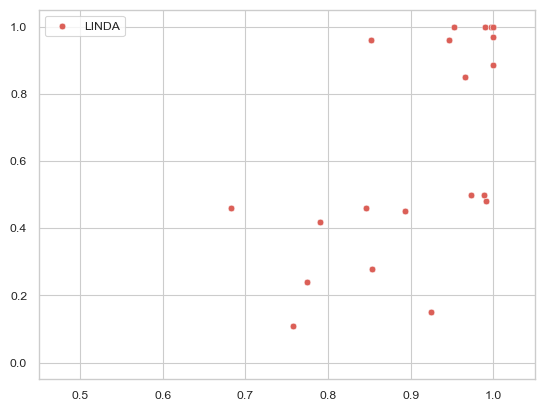

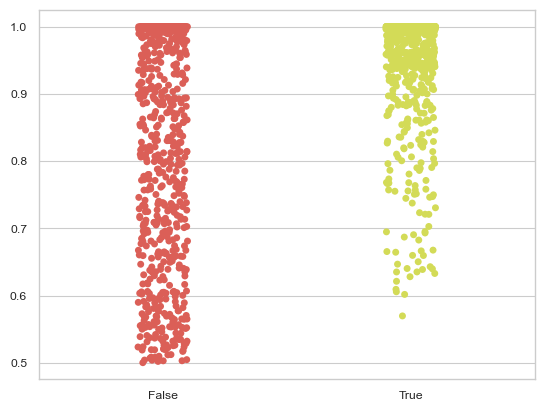

In [14]:
sns.scatterplot(x=prob, y=linda_attr, label = "LINDA")
#sns.scatterplot(x=prob, y=acv_attr, label = "ACV")
plt.xlim(0.45, 1.05)
plt.ylim(-0.05, 1.05)
plt.show()

prob = df[df["XAI Method"]=="LINDA"]["Prediction Probability"].values
linda_attr = df[df["XAI Method"]=="LINDA"]["Subset Stability"].isna().values
sns.stripplot(x = linda_attr, y=prob)
plt.show()

In [15]:
prob.shape

(1878,)

In [37]:
dataset_name = "bpic2012"
bucket = "prefix"
encoding="index"
model="nb"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucket, encoding))

num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

vec_lens = []

results = []

for bucket in range(1, num_buckets+1):
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
    results.append(pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)), sep=";"))

    vec_lens.append(sample.shape[1])
    
if len(vec_lens) == 1:
    vec_lens = vec_lens * 14
    
pref_lens = np.arange(1,15,1)
x_ticks = np.arange(1,15,1)

#results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"), sep=";")#.fillna(1)
results = pd.concat(results)
grouped = results.groupby("Prefix Length")

for _, group in grouped:
    print(_)
    #print(results.isna().sum())
    print("SHAP Precision", np.mean(group["SHAP Precision"]))
    print("LIME Precision", np.mean(group["LIME Precision"]))
    print("\n")
    
    print("SHAP Recall", np.mean(group["SHAP Recall"]))
    print("LIME Recall", np.mean(group["LIME Recall"]))
    print("\n")
    
    print("SHAP Correlation", np.mean(group["SHAP Correlation"]))
    print("LIME Correlation", np.mean(group["LIME Correlation"]))
#     print("\n")
# #     print("Overall", ))

#     print ("SHAP Recall")
#     print("Overall", np.mean(group["SHAP Recall"]))

#     print ("SHAP Correlation")
#     print("Overall", np.mean(group["SHAP Correlation"]))

#     print ("LIME Precision")
#     print("Overall", np.mean(group["LIME Precision"]))

#     print ("LIME Recall")
#     print("Overall", np.mean(group["LIME Recall"]))

#     print ("LIME Correlation")
#     print("Overall", np.mean(group["LIME Correlation"]))
    
    print("\n---------------------\n")

print("Overall")

print("SHAP Precision", np.mean(results["SHAP Precision"]))
print("LIME Precision", np.mean(results["LIME Precision"]))
print("\n")

print("SHAP Recall", np.mean(results["SHAP Recall"]))
print("LIME Recall", np.mean(results["LIME Recall"]))
print("\n")

print("SHAP Correlation", np.mean(results["SHAP Correlation"]))
print("LIME Correlation", np.mean(results["LIME Correlation"]))    

# print ("LIME Subset Stability")
# print("Overall", np.mean(results["LIME Subset Stability"]))

# print ("LIME Weight Stability")
# print("Overall", np.mean(results["LIME Adjusted Weight Stability"]))

# print ("ACV Subset Stability")
# print("Overall", np.mean(results["ACV Subset Stability"]))

# print ("ACV Weight Stability")
# print("Overall", np.mean(results["ACV Adjusted Weight Stability"]))

# if encoding!="index":
#     print ("LINDA-BN Subset Stability")
#     print("Overall", np.mean(results["LINDA Subset Stability"]))
    
#     print ("LINDA-BN Weight Stability")
#     print("Overall", np.mean(results["LINDA Adjusted Weight Stability"]))
    

1.0
SHAP Precision 0.625
LIME Precision 0.625


SHAP Recall 0.5625
LIME Recall 0.5


SHAP Correlation 0.8555555555555554
LIME Correlation 0.8388888888888887

---------------------

2.0
SHAP Precision 0.875
LIME Precision 0.875


SHAP Recall 0.6979166666666667
LIME Recall 0.6041666666666666


SHAP Correlation 0.8642957727314028
LIME Correlation 0.837979074523235

---------------------

3.0
SHAP Precision 0.875
LIME Precision 0.0


SHAP Recall 0.875
LIME Recall 0.0


SHAP Correlation 0.7339743927122069
LIME Correlation 0.764838656130076

---------------------

4.0
SHAP Precision 0.25
LIME Precision 0.24999999999999997


SHAP Recall 0.25
LIME Recall 0.75


SHAP Correlation 0.2642153982141697
LIME Correlation 0.6876787603987682

---------------------

5.0
SHAP Precision 0.875
LIME Precision 0.0


SHAP Recall 0.875
LIME Recall 0.0


SHAP Correlation 0.12396400930217476
LIME Correlation 0.6628234233729544

---------------------

6.0
SHAP Precision 0.6875
LIME Precision 0.041666666666666664



In [ ]:
results

In [22]:
dataset_names = ["bpic2011", "bpic2012", "production", "sepsis_cases"]
preprocs = ["single_agg", "prefix_agg", "prefix_index"]
#models= ["decision_tree", "logit"]#, "nb"]
dataset_names = ["production", "sepsis_cases"]
models = ["nb"]

for preproc in preprocs:
    for dataset_name in dataset_names:
        for model in models:
            print("________________________________________________________________________")
            print(dataset_name, model, preproc)
            folder_loc = os.path.join(PATH, "%s/%s/%s/" %(dataset_name,model,preproc))

            num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

            vec_lens = []
            
            results = []
            
            for bucket in range(1, num_buckets+1):
                sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
                results.append(pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)), sep=";"))
                vec_lens.append(sample.shape[1])

            if len(vec_lens) == 1:
                vec_lens = vec_lens * 14

            pref_lens = np.arange(1,15,1)
            x_ticks = np.arange(1,15,1)

            #results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"), sep=";")#.fillna(1)
            #grouped = results.groupby("Prefix Length")
            
            results = pd.concat(results)

            #print(results.isna().sum())

            # if encoding == "index":
            #     fig, ax = plt.subplots(5, 3, figsize=(10,15))
            # else:
            #     fig, ax = plt.subplots(5, 4, figsize=(12,15))

            # sns.lineplot(data = results, x = "Prefix Length", y = "SHAP Subset Stability", ci="sd", err_style="band", ax=ax[0][0], label="Stability", legend=False)
            # ax2 = ax[0][0].twinx()
            # sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
            # ax[0][0].set_xticks(x_ticks)
            # ax[0][0].set_ylim(0,1.1)
            # ax2.set_ylim(1,1400)
            # plt.xlabel("Prefix Length")
            # ax[0][0].set_ylabel("SHAP - Stability by Subset (Mean)")
            # ax2.set_ylabel("Vector Length")
            # ax[0][0].figure.legend()

            # sns.lineplot(data = results, x = "Prefix Length", y = "SHAP Adjusted Weight Stability", ci="sd", err_style="band", ax=ax[1][0], label="Stability", legend=False)
            # ax2 = ax[1][0].twinx()
            # sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
            # ax[1][0].set_xticks(x_ticks)
            # #ax[1][0].set_ylim(0,1.1)
            # ax2.set_ylim(1,1400)
            # plt.xlabel("Prefix Length")
            # ax[1][0].set_ylabel("SHAP - Stability by Weight (Mean)")
            # ax2.set_ylabel("Vector Length")

            # empty_exp = []
            # for i in pref_lens:
            #     len_res = results[results["Prefix Length"]==i]
            #     empty_exp.append(len_res["SHAP Subset Stability"].isna().sum()/len(len_res["SHAP Subset Stability"].values))

            # sns.barplot(x=pref_lens, y=empty_exp, ax=ax[2][0])
            # ax[2][0].set_xticks(x_ticks)
            # ax[2][0].set_ylim(0, 1.1)
            # plt.xlabel("Prefix Length")
            # ax[2][0].set_ylabel("Proportion Empty Explanations")

            # sns.scatterplot(data = results, x = "Prediction Probability", y = "SHAP Subset Stability", hue = "Prediction", ax = ax[3][0])
            # ax[3][0].set_xlabel("Prediction Probability")
            # ax[3][0].set_ylabel("SHAP - Stability by Subset")
            # ax[3][0].set_ylim(0, 1.1)

            # sns.scatterplot(data = results, x = "Prediction Probability", y = "SHAP Adjusted Weight Stability", hue = "Prediction", ax = ax[4][0])
            # ax[4][0].set_ylabel("SHAP - Stability by Weight")
            # ax[4][0].set_xlabel("Prediction Probability")

            # sns.lineplot(data = results, x = "Prefix Length", y = "LIME Subset Stability", ci="sd", err_style="band", ax=ax[0][1], label="Stability", legend=False)
            # ax2 = ax[0][1].twinx()
            # sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
            # ax[0][1].set_xticks(x_ticks)
            # ax[0][1].set_ylim(0,1.1)
            # ax2.set_ylim(1,1400)
            # plt.xlabel("Prefix Length")
            # ax[0][1].set_ylabel("LIME - Stability by Subset (Mean)")
            # ax2.set_ylabel("Vector Length")

            # sns.lineplot(data = results, x = "Prefix Length", y = "LIME Adjusted Weight Stability", ci="sd", err_style="band", ax=ax[1][1], label="Stability", legend=False)
            # ax2 = ax[1][1].twinx()
            # sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
            # ax[1][1].set_xticks(x_ticks)
            # #ax[1][1].set_ylim(0,1.1)
            # ax2.set_ylim(1,1400)
            # plt.xlabel("Prefix Length")
            # ax[1][1].set_ylabel("LIME - Stability by Weight (Mean)")
            # ax2.set_ylabel("Vector Length")

            # empty_exp = []
            # for i in pref_lens:
            #     len_res = results[results["Prefix Length"]==i]
            #     empty_exp.append(len_res["LIME Subset Stability"].isna().sum()/len(len_res["LIME Subset Stability"].values))

            # sns.barplot(x=pref_lens, y=empty_exp, ax=ax[2][1])
            # ax[2][1].set_xticks(x_ticks)
            # ax[2][1].set_ylim(0, 1.1)
            # plt.xlabel("Prefix Length")
            # ax[2][1].set_ylabel("Proportion Empty Explanations")

            # sns.scatterplot(data = results, x = "Prediction Probability", y = "LIME Subset Stability", hue = "Prediction", ax = ax[3][1])
            # ax[3][1].set_xlabel("Prediction Probability")
            # ax[3][1].set_ylabel("LIME - Stability by Subset")
            # ax[3][1].set_ylim(0, 1.1)

            # sns.scatterplot(data = results, x = "Prediction Probability", y = "LIME Adjusted Weight Stability", hue = "Prediction", ax = ax[4][1])
            # ax[4][1].set_ylabel("LIME - Stability by Weight")
            # ax[4][1].set_xlabel("Prediction Probability")

            # sns.lineplot(data = results, x = "Prefix Length", y = "ACV Subset Stability", ci="sd", err_style="band", ax=ax[0][2], label="Stability", legend=False)
            # ax2 = ax[0][2].twinx()
            # sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
            # ax[0][2].set_xticks(x_ticks)
            # ax[0][2].set_ylim(0,1.1)
            # ax2.set_ylim(1,1400)
            # plt.xlabel("Prefix Length")
            # ax[0][2].set_ylabel("ACV - Stability by Subset (Mean)")
            # ax2.set_ylabel("Vector Length")

            # sns.lineplot(data = results, x = "Prefix Length", y = "ACV Adjusted Weight Stability", ci="sd", err_style="band", ax=ax[1][2], label="Stability", legend=False)
            # ax2 = ax[1][2].twinx()
            # sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
            # ax[1][2].set_xticks(x_ticks)
            # ax[1][2].set_ylim(0,1.1)
            # ax2.set_ylim(1,1400)
            # plt.xlabel("Prefix Length")
            # ax[1][2].set_ylabel("ACV - Stability by Weight (Mean)")
            # ax2.set_ylabel("Vector Length")

            # empty_exp = []
            # for i in pref_lens:
            #     len_res = results[results["Prefix Length"]==i]
            #     empty_exp.append(len_res["ACV Subset Stability"].isna().sum()/len(len_res["ACV Subset Stability"].values))

            # sns.barplot(x=pref_lens, y=empty_exp, ax=ax[2][2])
            # ax[2][2].set_xticks(x_ticks)
            # ax[2][2].set_ylim(0, 1.1)
            # plt.xlabel("Prefix Length")
            # ax[2][2].set_ylabel("Proportion Empty Explanations")

            # attr = results["ACV Subset Stability"].isna()
            # attr = attr.map({True:"Attributive", False:"Not Attributive"})
            # sns.scatterplot(data = results, x = "Prefix Length", y = "Prediction Probability", hue = attr, ax=ax[3][2])

            # if encoding != "index":
            #     sns.lineplot(data = results, x = "Prefix Length", y = "LINDA Subset Stability", ci="sd", err_style="band", ax=ax[0][3], label="Stability", legend=False)
            #     ax2 = ax[0][3].twinx()
            #     sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
            #     ax[0][3].set_xticks(x_ticks)
            #     ax[0][3].set_ylim(0,1.1)
            #     ax2.set_ylim(1,1400)
            #     plt.xlabel("Prefix Length")
            #     ax[0][3].set_ylabel("LINDA - Stability by Subset (Mean)")
            #     ax2.set_ylabel("Vector Length")

            #     sns.lineplot(data = results, x = "Prefix Length", y = "LINDA Adjusted Weight Stability", ci="sd", err_style="band", ax=ax[1][3], label="Stability", legend=False)
            #     ax2 = ax[1][3].twinx()
            #     sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
            #     ax[1][3].set_xticks(x_ticks)
            #     ax[1][3].set_ylim(0,1.1)
            #     ax2.set_ylim(1,1400)
            #     plt.xlabel("Prefix Length")
            #     ax[1][3].set_ylabel("LINDA - Stability by Weight (Mean)")
            #     ax2.set_ylabel("Vector Length")

            #     empty_exp = []
            #     for i in pref_lens:
            #         len_res = results[results["Prefix Length"]==i]
            #         empty_exp.append(len_res["LINDA Subset Stability"].isna().sum()/len(len_res["LINDA Subset Stability"].values))

            #     sns.barplot(x=pref_lens, y=empty_exp, ax=ax[2][3])
            #     ax[2][3].set_xticks(x_ticks)
            #     ax[2][3].set_ylim(0, 1.1)
            #     plt.xlabel("Prefix Length")
            #     ax[2][3].set_ylabel("Proportion Empty Explanations")

            #     attr = results["LINDA Subset Stability"].isna()
            #     attr = attr.map({True:"Attributive", False:"Not Attributive"})
            #     sns.scatterplot(data = results, x = "Prefix Length", y = "Prediction Probability", hue = attr, ax=ax[3][3])

            # fig.tight_layout(pad=2)
            # plt.show()

            print ("SHAP Precision")
            print("Overall", np.mean(results["SHAP Precision"]))

            print ("SHAP Recall")
            print("Overall", np.mean(results["SHAP Recall"]))

            print ("SHAP Correlation")
            print("Overall", np.mean(results["SHAP Correlation"]))

            print ("LIME Precision")
            print("Overall", np.mean(results["LIME Precision"]))

            print ("LIME Recall")
            print("Overall", np.mean(results["LIME Recall"]))

            print ("LIME Correlation")
            print("Overall", np.mean(results["LIME Correlation"]))



________________________________________________________________________
production nb single_agg
SHAP Precision
Overall 0.7857142857142857
SHAP Recall
Overall 0.6036883503401361
SHAP Correlation
Overall 0.22676064050480074
LIME Precision
Overall 0.16207837301587297
LIME Recall
Overall 0.1457270408163265
LIME Correlation
Overall 0.5799067577215107
________________________________________________________________________
sepsis_cases nb single_agg
SHAP Precision
Overall 0.4419642857142857
SHAP Recall
Overall 0.44642857142857145
SHAP Correlation
Overall 0.090794964146532
LIME Precision
Overall 0.034226190476190486
LIME Recall
Overall 0.1279761904761905
LIME Correlation
Overall 0.5036434087986982
________________________________________________________________________
production nb prefix_agg
SHAP Precision
Overall 0.8333333333333334
SHAP Recall
Overall 0.7745535714285714
SHAP Correlation
Overall 0.396268596388803
LIME Precision
Overall 0.03762046485260771
LIME Recall
Overall 0.0859375
LIM

In [1]:
results

NameError: name 'results' is not defined

In [ ]:
folder_loc

In [ ]:
dataset_name = "sepsis_cases"
bucket = "prefix"
encoding="index"
model="nb"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucket, encoding))

num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

vec_lens = []

for bucket in range(1, num_buckets+1):
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
    vec_lens.append(sample.shape[1])
    
if len(vec_lens) == 1:
    vec_lens = vec_lens * 14
    
pref_lens = np.arange(1,15,1)
x_ticks = np.arange(1,15,1)

results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"), sep=";")#.fillna(1)
grouped = results.groupby("Prefix Length")

#print(results.isna().sum())

if encoding == "index":
    fig, ax = plt.subplots(5, 3, figsize=(10,15))
else:
    fig, ax = plt.subplots(5, 4, figsize=(12,15))

sns.lineplot(data = results, x = "Prefix Length", y = "SHAP Subset Stability", ci="sd", err_style="band", ax=ax[0][0], label="Stability", legend=False)
ax2 = ax[0][0].twinx()
sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_ylim(0,1.1)
ax2.set_ylim(1,1400)
plt.xlabel("Prefix Length")
ax[0][0].set_ylabel("SHAP - Stability by Subset (Mean)")
ax2.set_ylabel("Vector Length")
ax[0][0].figure.legend()

sns.lineplot(data = results, x = "Prefix Length", y = "SHAP Adjusted Weight Stability", ci="sd", err_style="band", ax=ax[1][0], label="Stability", legend=False)
ax2 = ax[1][0].twinx()
sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
ax[1][0].set_xticks(x_ticks)
#ax[1][0].set_ylim(0,1.1)
ax2.set_ylim(1,1400)
plt.xlabel("Prefix Length")
ax[1][0].set_ylabel("SHAP - Stability by Weight (Mean)")
ax2.set_ylabel("Vector Length")

empty_exp = []
for i in pref_lens:
    len_res = results[results["Prefix Length"]==i]
    empty_exp.append(len_res["SHAP Subset Stability"].isna().sum()/len(len_res["SHAP Subset Stability"].values))

al = sns.barplot(x=pref_lens, y=empty_exp, ax=ax[2][0])
ax[2][0].set_xticks(x_ticks)
ax[2][0].set_ylim(0, 1.1)
plt.xlabel("Prefix Length")
ax[2][0].set_ylabel("Proportion Empty Explanations")
#al.bar_label(al.containers[0])
print("SHAP Empty Explanations:", np.mean(empty_exp))

sns.scatterplot(data = results, x = "Prediction Probability", y = "SHAP Subset Stability", hue = "Prediction", ax = ax[3][0])
ax[3][0].set_xlabel("Prediction Probability")
ax[3][0].set_ylabel("SHAP - Stability by Subset")
ax[3][0].set_ylim(0, 1.1)

sns.scatterplot(data = results, x = "Prediction Probability", y = "SHAP Adjusted Weight Stability", hue = "Prediction", ax = ax[4][0])
ax[4][0].set_ylabel("SHAP - Stability by Weight")
ax[4][0].set_xlabel("Prediction Probability")

sns.lineplot(data = results, x = "Prefix Length", y = "LIME Subset Stability", ci="sd", err_style="band", ax=ax[0][1], label="Stability", legend=False)
ax2 = ax[0][1].twinx()
sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_ylim(0,1.1)
ax2.set_ylim(1,1400)
plt.xlabel("Prefix Length")
ax[0][1].set_ylabel("LIME - Stability by Subset (Mean)")
ax2.set_ylabel("Vector Length")

sns.lineplot(data = results, x = "Prefix Length", y = "LIME Adjusted Weight Stability", ci="sd", err_style="band", ax=ax[1][1], label="Stability", legend=False)
ax2 = ax[1][1].twinx()
sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
ax[1][1].set_xticks(x_ticks)
#ax[1][1].set_ylim(0,1.1)
ax2.set_ylim(1,1400)
plt.xlabel("Prefix Length")
ax[1][1].set_ylabel("LIME - Stability by Weight (Mean)")
ax2.set_ylabel("Vector Length")

empty_exp = []
for i in pref_lens:
    len_res = results[results["Prefix Length"]==i]
    empty_exp.append(len_res["LIME Subset Stability"].isna().sum()/len(len_res["LIME Subset Stability"].values))

al = sns.barplot(x=pref_lens, y=empty_exp, ax=ax[2][1])
ax[2][1].set_xticks(x_ticks)
ax[2][1].set_ylim(0, 1.1)
plt.xlabel("Prefix Length")
ax[2][1].set_ylabel("Proportion Empty Explanations")
#al.bar_label(al.containers[0])
print("LIME Empty Explanations:", np.mean(empty_exp))

sns.scatterplot(data = results, x = "Prediction Probability", y = "LIME Subset Stability", hue = "Prediction", ax = ax[3][1])
ax[3][1].set_xlabel("Prediction Probability")
ax[3][1].set_ylabel("LIME - Stability by Subset")
ax[3][1].set_ylim(0, 1.1)

sns.scatterplot(data = results, x = "Prediction Probability", y = "LIME Adjusted Weight Stability", hue = "Prediction", ax = ax[4][1])
ax[4][1].set_ylabel("LIME - Stability by Weight")
ax[4][1].set_xlabel("Prediction Probability")

sns.lineplot(data = results, x = "Prefix Length", y = "ACV Subset Stability", ci="sd", err_style="band", ax=ax[0][2], label="Stability", legend=False)
ax2 = ax[0][2].twinx()
sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
ax[0][2].set_xticks(x_ticks)
ax[0][2].set_ylim(0,1.1)
ax2.set_ylim(1,1400)
plt.xlabel("Prefix Length")
ax[0][2].set_ylabel("ACV - Stability by Subset (Mean)")
ax2.set_ylabel("Vector Length")

sns.lineplot(data = results, x = "Prefix Length", y = "ACV Adjusted Weight Stability", ci="sd", err_style="band", ax=ax[1][2], label="Stability", legend=False)
ax2 = ax[1][2].twinx()
sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
ax[1][2].set_xticks(x_ticks)
ax[1][2].set_ylim(0,1.1)
ax2.set_ylim(1,1400)
plt.xlabel("Prefix Length")
ax[1][2].set_ylabel("ACV - Stability by Weight (Mean)")
ax2.set_ylabel("Vector Length")

empty_exp = []
for i in pref_lens:
    len_res = results[results["Prefix Length"]==i]
    empty_exp.append(len_res["ACV Subset Stability"].isna().sum()/len(len_res["ACV Subset Stability"].values))

al = sns.barplot(x=pref_lens, y=empty_exp, ax=ax[2][2])
ax[2][2].set_xticks(x_ticks)
ax[2][2].set_ylim(0, 1.1)
plt.xlabel("Prefix Length")
ax[2][2].set_ylabel("Proportion Empty Explanations")
#al.bar_label(al.containers[0])
print("ACV Empty Explanations:", np.mean(empty_exp))

attr = results["ACV Subset Stability"].isna()
attr = attr.map({True:"Attributive", False:"Not Attributive"})
sns.scatterplot(data = results, x = "Prefix Length", y = "Prediction Probability", hue = attr, ax=ax[3][2])

if encoding != "index":
    sns.lineplot(data = results, x = "Prefix Length", y = "LINDA Subset Stability", ci="sd", err_style="band", ax=ax[0][3], label="Stability", legend=False)
    ax2 = ax[0][3].twinx()
    sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
    ax[0][3].set_xticks(x_ticks)
    ax[0][3].set_ylim(0,1.1)
    ax2.set_ylim(1,1400)
    plt.xlabel("Prefix Length")
    ax[0][3].set_ylabel("LINDA - Stability by Subset (Mean)")
    ax2.set_ylabel("Vector Length")

    sns.lineplot(data = results, x = "Prefix Length", y = "LINDA Adjusted Weight Stability", ci="sd", err_style="band", ax=ax[1][3], label="Stability", legend=False)
    ax2 = ax[1][3].twinx()
    sns.lineplot(pref_lens[:len(vec_lens)], vec_lens, label = "Feature Vector Length", color = 'blue', ax=ax2, legend=False)
    ax[1][3].set_xticks(x_ticks)
    ax[1][3].set_ylim(0,1.1)
    ax2.set_ylim(1,1400)
    plt.xlabel("Prefix Length")
    ax[1][3].set_ylabel("LINDA - Stability by Weight (Mean)")
    ax2.set_ylabel("Vector Length")
    
    empty_exp = []
    for i in pref_lens:
        len_res = results[results["Prefix Length"]==i]
        empty_exp.append(len_res["LINDA Subset Stability"].isna().sum()/len(len_res["LINDA Subset Stability"].values))

    al = sns.barplot(x=pref_lens, y=empty_exp, ax=ax[2][3])
    ax[2][3].set_xticks(x_ticks)
    ax[2][3].set_ylim(0, 1.1)
    plt.xlabel("Prefix Length")
    ax[2][3].set_ylabel("Proportion Empty Explanations")
    #al.bar_label(al.containers[0])
    print("LINDA Empty Explanations:", np.mean(empty_exp))
    
    attr = results["LINDA Subset Stability"].isna()
    attr = attr.map({True:"Attributive", False:"Not Attributive"})
    sns.scatterplot(data = results, x = "Prefix Length", y = "Prediction Probability", hue = attr, ax=ax[3][3])

fig.tight_layout(pad=2)
plt.show()

# print ("SHAP Subset Stability")
# print("Overall", np.mean(results["SHAP Subset Stability"]))

# print ("SHAP Weight Stability")
# print("Overall", np.mean(results["SHAP Adjusted Weight Stability"]))

# print ("LIME Subset Stability")
# print("Overall", np.mean(results["LIME Subset Stability"]))

# print ("LIME Weight Stability")
# print("Overall", np.mean(results["LIME Adjusted Weight Stability"]))

# print ("ACV Subset Stability")
# print("Overall", np.mean(results["ACV Subset Stability"]))

# print ("ACV Weight Stability")
# print("Overall", np.mean(results["ACV Adjusted Weight Stability"]))

# if encoding!="index":
#     print ("LINDA-BN Subset Stability")
#     print("Overall", np.mean(results["LINDA Subset Stability"]))
    
#     print ("LINDA-BN Weight Stability")
#     print("Overall", np.mean(results["LINDA Adjusted Weight Stability"]))
    

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10,6))
sns.countplot(hue=results["Prediction"], x=results["Prefix Length"].astype(int), ax=ax[0][0])
sns.kdeplot(results["Prediction Probability"], fill=True, hue=results["Prediction"], ax=ax[0][1])
sns.boxplot(results["Prefix Length"].astype(int), results["Prediction Probability"], hue=results["Prediction"], ax=ax[0][2])
sns.countplot(hue=results["Actual"], x=results["Prefix Length"].astype(int), ax=ax[1][0])
sns.kdeplot(results["Prediction Probability"], fill=True, hue=results["Actual"], ax=ax[1][1])
sns.boxplot(results["Prefix Length"].astype(int), results["Prediction Probability"], hue=results["Actual"], ax=ax[1][2])

fig.tight_layout(pad=2)
plt.show()

In [ ]:
ax[0][0]

In [ ]:
sns.countplot(hue=results["Actual"], x=results["Prefix Length"])
plt.show()
sns.kdeplot(results["Prediction Probability"], fill=True, hue=results["Actual"])
plt.show()

In [ ]:
vec_lens

In [ ]:
len(pref_lens)

In [ ]:
len(vec_lens)

In [ ]:
stab

In [ ]:
print("Smallest vector length: %s. Largest vector length: %s." % (min(vec_lens), max(vec_lens)))

results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv")).fillna(1)

prefixes = results["Prefix Length"].tolist()
vectors = [vec_lens[int(i)-1] for i in prefixes]
results["Vector Lengths"] = vectors

vector_groups = results.groupby('Vector Lengths')

vec_based_stab = vector_groups["LIME Subset Stability"].mean()

fig, ax1 = plt.subplots()
sns.scatterplot(results["Vector Lengths"], results["LIME Subset Stability"], 
                hue = results["Prediction Probability"], palette = cmap)
ax2 = ax1.twinx()
sns.lineplot(results["Vector Lengths"].unique(), vec_based_stab, legend = 'full', 
             label='Mean Stability for Vector Length', color = 'black')
#plt.xlim(1, 21)
ax1.set_ylim(0,1.1)
ax2.set_ylim(0,1.1)
plt.xlabel("Vector Length")
ax1.set_ylabel("LIME - Stability by Subset")
ax2.set_ylabel("LIME - Stability by Subset (Mean)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.6), loc = 'upper left')
plt.show()


vec_based_stab = vector_groups["LIME Weight Stability"].mean()

fig, ax1 = plt.subplots()
sns.scatterplot(results["Vector Lengths"], results["LIME Weight Stability"], 
                hue = results["Prediction Probability"], palette = cmap)
ax2 = ax1.twinx()
sns.lineplot(results["Vector Lengths"].unique(), vec_based_stab, legend = 'full', label='Mean Stability for Vector Length')
#plt.xlim(1, 21)
ax1.set_ylim(0,1.1)
ax2.set_ylim(0,1.1)
plt.xlabel("Vector Length")
ax1.set_ylabel("LIME - Stability by Weight")
ax2.set_ylabel("LIME - Stability by Weight (Mean)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.6), loc = 'upper left')
plt.show()

In [ ]:
stab = grouped["LIME Subset Stability"].mean()


# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig, ax1 = plt.subplots()
sns.scatterplot(results["Prefix Length"], results["LIME Subset Stability"], 
                hue = results["Prediction Probability"], palette = cmap)
ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], stab, legend = 'full', label='Mean Stability for Prefix Length', color = 'black')
ax1.set_xticks(np.arange(0, 21, 1))
ax1.set_ylim(0,1.1)
ax2.set_ylim(0,1.1)
plt.xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Subset")
ax2.set_ylabel("LIME - Stability by Subset (Mean)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.6), loc = 'upper left')
plt.show()

stab = grouped["LIME Adjusted Weight Stability"].mean()


#map = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig, ax1 = plt.subplots()
sns.scatterplot(results["Prefix Length"], results["LIME Adjusted Weight Stability"], 
                hue = results["Prediction Probability"], palette = cmap)
ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], stab, legend = 'full', label='Mean Stability for Prefix Length')
plt.xlim(1, 21)
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
#plt.ylim(0,1.1)
plt.xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Weight")
ax2.set_ylabel("LIME - Stability by Weight (Mean)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.6), loc = 'upper left')
plt.show()


In [ ]:
raw_results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"))

print("Overall SHAP empty results\t", raw_results["SHAP Subset Stability"].isna().sum()/len(raw_results["SHAP Subset Stability"]))
print("Overall LIME empty results\t", raw_results["LIME Subset Stability"].isna().sum()/len(raw_results["LIME Subset Stability"]))

shap_empty = []
lime_empty = []

for i in range(1, 21):
    #print("Bucket", i)
    raw_len_res = raw_results[raw_results["Prefix Length"]==i]
    shap_empty.append(raw_len_res["SHAP Subset Stability"].isna().sum()/len(raw_len_res["SHAP Subset Stability"]))
    lime_empty.append(raw_len_res["LIME Subset Stability"].isna().sum()/len(raw_len_res["LIME Subset Stability"]))
    #print(lime_empty[i-1])
    
stab = grouped["LIME Subset Stability"].mean()

fig, ax1 = plt.subplots()
ax1.bar(pref_lens[:len(stab)], lime_empty[:len(stab)], label = "Proportion of Empty Explanations", color = 'red')
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], stab, label = "Mean Subset Stability", color='black')
#ax1.set_xticks(np.arange(0, 21, 1))
ax1.set_xticks(pref_lens)
ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax2.set_ylabel("LIME - Stability by Subset (Mean)")
ax1.set_ylabel("LIME - Proportion of Empty Explanations")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.grid(True, color='w', linestyle='-', linewidth=3)
#sns.set_style('darkgrid')
plt.show()

stab = grouped["LIME Adjusted Weight Stability"].mean()

fig, ax1 = plt.subplots()
sns.lineplot(pref_lens[:len(stab)], lime_empty[:len(stab)], label = "Proportion of Empty Explanations", color = 'blue')
#ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], stab, label = "Mean Weight Stability")
plt.xlim(0, 21)
ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Weight (Mean)")
ax2.set_ylabel("LIME - Proportion of Empty Explanations")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()


# stab = grouped["SHAP Subset Stability"].mean()

# fig, ax1 = plt.subplots()
# sns.lineplot(pref_lens[:len(stab)], stab, label = "Mean Subset Stability")
# ax2 = ax1.twinx()
# sns.lineplot(pref_lens[:len(stab)], shap_empty[:len(stab)], label = "Proportion of Empty Explanations", color = 'blue')
# plt.xlim(1, 21)
# ax1.set_ylim(-0.1, 1.1)
# ax2.set_ylim(-0.1, 1.1)
# #plt.ylim(0,1.1)
# ax1.set_xlabel("Prefix Length")
# ax1.set_ylabel("SHAP - Stability by Subset (Mean)")
# ax2.set_ylabel("SHAP - Proportion of Empty Explanations")
# ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
# ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
# plt.show()

# stab = grouped["SHAP Adjusted Weight Stability"].mean()

# fig, ax1 = plt.subplots()
# sns.lineplot(pref_lens[:len(stab)], stab, label = "Mean Weight Stability")
# ax2 = ax1.twinx()
# sns.lineplot(pref_lens[:len(stab)], shap_empty[:len(stab)], label = "Proportion of Empty Explanations", color = 'blue')
# plt.xlim(1, 21)
# ax1.set_ylim(-5, 1.1)
# ax2.set_ylim(-0.1, 1.1)
# #plt.ylim(0,1.1)
# ax1.set_xlabel("Prefix Length")
# ax1.set_ylabel("SHAP - Stability by Weight (Mean)")
# ax2.set_ylabel("SHAP - Proportion of Empty Explanations")
# ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
# ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
# plt.show()



In [ ]:
accs = []

for bucket in range(1, num_buckets+1):
    acc_per_len = []
    
    pipeline = joblib.load(os.path.join(folder_loc, "pipelines/pipeline_bucket_%s.joblib" % (bucket)))
    cls = pipeline['cls']
    if 'scaler' in pipeline.named_steps:
        scaler = pipeline['scaler']
    else:
        scaler = None
    
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
    results = pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)))
    data = pd.concat([sample, results], axis = 1)
    
    for i in data["Prefix Length"].unique():
        len_data = data[data["Prefix Length"] == i]
        y = len_data["Actual"].tolist()
        irrelevant_cols = ["Case ID", "Actual", "Prefix Length", "Prediction", "Prediction Probability"]
        relevant_cols = [col for col in len_data.columns if col not in irrelevant_cols]
        x = len_data[relevant_cols].values
        
        if scaler!=None:
            x = scaler.transform(x)
        
        acc_per_len.append(f1_score(y, cls.predict(x)))
        
    accs.append(acc_per_len)
    
accs = np.array(accs).flatten()

stab = grouped["LIME Subset Stability"].mean()

fig, ax1 = plt.subplots()
sns.lineplot(pref_lens[:len(stab)], stab, label = "Mean Subset Stability")
ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], accs[:len(stab)], label = "Classifier Accuracy", color = 'blue')
plt.xlim(1, 21)
ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Subset (Mean)")
ax2.set_ylabel("Classifier Accuracy (F1)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

stab = grouped["LIME Adjusted Weight Stability"].mean()

fig, ax1 = plt.subplots()
sns.lineplot(pref_lens[:len(stab)], stab[:len(stab)], label = "Mean Weight Stability")
ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], accs[:len(stab)], label = "Classifier Accuracy", color = 'blue')
plt.xlim(1, 21)
ax1.set_ylim(-5, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Weight (Mean)")
ax2.set_ylabel("Classifier Accuracy (F1)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

fig, ax1 = plt.subplots()
ax1.bar(pref_lens[:len(stab)], lime_empty[:len(stab)], label = "Proportion of Empty LIME Explanations", color='red')
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], accs[:len(stab)], label ="Classifier Accuracy", color = 'black')
#ax3 = ax1.twinx()
#sns.lineplot(pref_lens[:len(stab)], shap_empty[:len(stab)], label = "Proportion of Empty SHAP Explanations", color="green")
ax1.set_xticks(pref_lens)
ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("Proportion of Empty Explanations")
ax2.set_ylabel("Classifier Accuracy (F1)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()
    

In [ ]:
ones = []
zeroes = []

for bucket in range(1, num_buckets+1):
    #print(bucket)
    
    pipeline = joblib.load(os.path.join(folder_loc, "pipelines/pipeline_bucket_%s.joblib" % (bucket)))
    cls = pipeline['cls']
    if 'scaler' in pipeline.named_steps:
        scaler = pipeline['scaler']
    else:
        scaler = None
    
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket))).values
    results = pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)))
    #data = pd.concat([sample, results], axis = 1)
    
    if scaler!=None:
        sample = scaler.transform(sample)
    preds = cls.predict(sample)
    
    uniques = np.unique(preds, return_counts=True)
    
    returned = uniques[0]
    count = uniques[1]
    total = np.sum(count)
    
    if 0 in returned:
        zero_loc = np.where(returned == 0)
        zero_prop = count[zero_loc]/total
    else:
        zero_prop = 0
        
    if 1 in returned:
        one_loc = np.where(returned == 1)
        one_prop = count[one_loc]/total
    else:
        one_prop = 1
        
    ones.append(float(one_prop))
    zeroes.append(float(zero_prop))
    
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(pref_lens[:len(stab)], lime_empty[:len(stab)], label = "Proportion of Empty LIME Explanations", color='red')
ax2.plot(pref_lens[:len(stab)], zeroes, label = "Proportion of Negative Predictions", color = 'black')
#ax1.bar(pref_lens[:len(stab)], ones, color='blue', label = "Positive Predictions", bottom = zeroes)
ax1.set_ylim(0, 1)
ax1.set_xticks(pref_lens)
ax2.set_ylim(0,1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("Proportion of Empty Explanations")
ax2.set_ylabel("Proportion of Negative Predictions")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

for i in range(len(stab)):
    print(i+1, " : ", zeroes[i])

In [ ]:
import scipy
stab = grouped["LIME Subset Stability"].mean()
corr_subset = scipy.stats.pearsonr(accs[:len(stab)], stab)

stab = grouped["LIME Adjusted Weight Stability"].mean()
corr_weight = scipy.stats.pearsonr(accs[:len(stab)], stab)

print("Correlation between accuracy and stability by subset:", corr_subset)
print("Correlation between accuracy and stability by weight:", corr_weight)